# Hello, KAN!

### Kolmogorov-Arnold representation theorem

Kolmogorov-Arnold representation theorem states that if $f$ is a multivariate continuous function
on a bounded domain, then it can be written as a finite composition of continuous functions of a
single variable and the binary operation of addition. More specifically, for a smooth $f : [0,1]^n \to \mathbb{R}$,


$$f(x) = f(x_1,...,x_n)=\sum_{q=1}^{2n+1}\Phi_q(\sum_{p=1}^n \phi_{q,p}(x_p))$$

where $\phi_{q,p}:[0,1]\to\mathbb{R}$ and $\Phi_q:\mathbb{R}\to\mathbb{R}$. In a sense, they showed that the only true multivariate function is addition, since every other function can be written using univariate functions and sum. However, this 2-Layer width-$(2n+1)$ Kolmogorov-Arnold representation may not be smooth due to its limited expressive power. We augment its expressive power by generalizing it to arbitrary depths and widths.

### Kolmogorov-Arnold Network (KAN)

The Kolmogorov-Arnold representation can be written in matrix form

$$f(x)={\bf \Phi}_{\rm out}\circ{\bf \Phi}_{\rm in}\circ {\bf x}$$

where 

$${\bf \Phi}_{\rm in}= \begin{pmatrix} \phi_{1,1}(\cdot) & \cdots & \phi_{1,n}(\cdot) \\ \vdots & & \vdots \\ \phi_{2n+1,1}(\cdot) & \cdots & \phi_{2n+1,n}(\cdot) \end{pmatrix},\quad {\bf \Phi}_{\rm out}=\begin{pmatrix} \Phi_1(\cdot) & \cdots & \Phi_{2n+1}(\cdot)\end{pmatrix}$$

We notice that both ${\bf \Phi}_{\rm in}$ and ${\bf \Phi}_{\rm out}$ are special cases of the following function matrix ${\bf \Phi}$ (with $n_{\rm in}$ inputs, and $n_{\rm out}$ outputs), we call a Kolmogorov-Arnold layer:

$${\bf \Phi}= \begin{pmatrix} \phi_{1,1}(\cdot) & \cdots & \phi_{1,n_{\rm in}}(\cdot) \\ \vdots & & \vdots \\ \phi_{n_{\rm out},1}(\cdot) & \cdots & \phi_{n_{\rm out},n_{\rm in}}(\cdot) \end{pmatrix}$$

${\bf \Phi}_{\rm in}$ corresponds to $n_{\rm in}=n, n_{\rm out}=2n+1$, and ${\bf \Phi}_{\rm out}$ corresponds to $n_{\rm in}=2n+1, n_{\rm out}=1$.

After defining the layer, we can construct a Kolmogorov-Arnold network simply by stacking layers! Let's say we have $L$ layers, with the $l^{\rm th}$ layer ${\bf \Phi}_l$ have shape $(n_{l+1}, n_{l})$. Then the whole network is

$${\rm KAN}({\bf x})={\bf \Phi}_{L-1}\circ\cdots \circ{\bf \Phi}_1\circ{\bf \Phi}_0\circ {\bf x}$$

In constrast, a Multi-Layer Perceptron is interleaved by linear layers ${\bf W}_l$ and nonlinearities $\sigma$:

$${\rm MLP}({\bf x})={\bf W}_{L-1}\circ\sigma\circ\cdots\circ {\bf W}_1\circ\sigma\circ {\bf W}_0\circ {\bf x}$$

A KAN can be easily visualized. (1) A KAN is simply stack of KAN layers. (2) Each KAN layer can be visualized as a fully-connected layer, with a 1D function placed on each edge. Let's see an example below.

### Get started with KANs

Initialize KAN

In [2]:
import torch


In [3]:
from kan import *
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[4,5,2], grid=5, k=3, seed=0)

Create dataset

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 读取xlsx文件
file_path = 'D:\OneDrive - Officials\OneDrive - Mraz Cindy\done\毕设资料\计算公式说明\数据库.xlsx'  # 替换为你的xlsx文件路径
df = pd.read_excel(file_path, engine='openpyxl')

# 打乱行顺序并按8:2的比例分成训练集和测试集
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# 输出结果
print("训练集样本数:", len(train_df))
print("测试集样本数:", len(test_df))

# 显示数据
print(df)
# 提取第2，3，4，5列的数据
input = train_df.iloc[:, 1:5]
output = train_df.iloc[:, 5:7]
test_input = test_df.iloc[:, 1:5]
test_label = test_df.iloc[:, 5:7]
# 将DataFrame转换为numpy数组并调整其维度为4
array1 = input.to_numpy()
array2 = output.to_numpy()
array3 = test_input.to_numpy()
array4 = test_label.to_numpy()
train_input=torch.tensor(array1, dtype=torch.float32)
train_ouput=torch.tensor(array2, dtype=torch.float32)
test_input=torch.tensor(array3, dtype=torch.float32)
test_label=torch.tensor(array4, dtype=torch.float32)
#test_input=torch.tensor([[1,4,5.1,26.5]], dtype=torch.float32)
dataset={'train_input':train_input,'test_input':test_input,'train_label':train_ouput,'test_label':test_label}

训练集样本数: 307
测试集样本数: 77
      序号   流速  D/h  翅片长度  翅片角度      涡流因子      湍流强度
0      1  0.5    1   5.1    20  0.086126  0.048330
1      2  0.5    4   5.1    20  0.042124  0.038711
2      3  0.5   10   5.1    20  0.031135  0.038277
3      4  0.5    1   5.1    21  0.093988  0.025422
4      5  0.5    4   5.1    21  0.046767  0.021133
..   ...  ...  ...   ...   ...       ...       ...
379  380  5.0    4   5.1    34  0.072160  0.342456
380  381  5.0   10   5.1    34  0.060467  0.297741
381  382  5.0    1   5.1    35  0.149605  0.390288
382  383  5.0    4   5.1    35  0.076762  0.349103
383  384  5.0   10   5.1    35  0.059155  0.299603

[384 rows x 7 columns]


Plot KAN at initialization

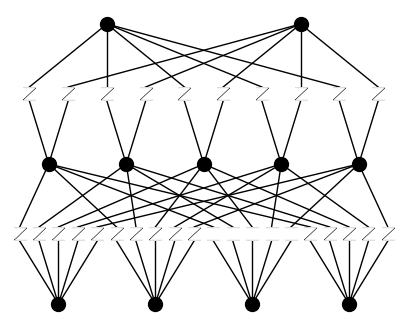

In [5]:
# plot KAN at initialization
model(dataset['train_input']);
model.plot(beta=100)

Train KAN with sparsity regularization

In [6]:
# train the model
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.);

train loss: 9.57e-02 | test loss: 9.78e-02 | reg: 6.54e+01 : 100%|██| 20/20 [00:08<00:00,  2.36it/s]


Plot trained KAN

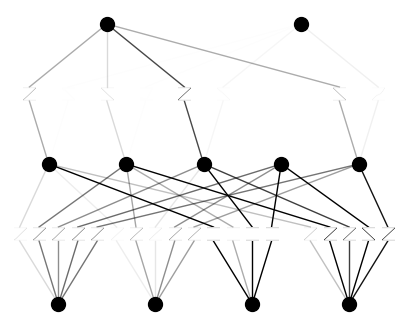

In [7]:
model.plot()

Prune KAN and replot (keep the original shape)

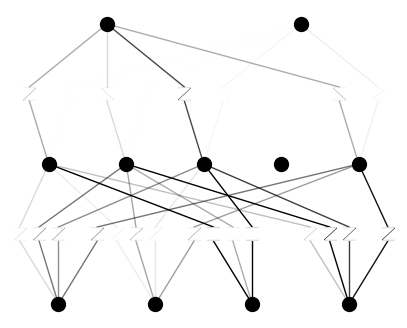

In [8]:
model.prune()
model.plot(mask=True)

Prune KAN and replot (get a smaller shape)

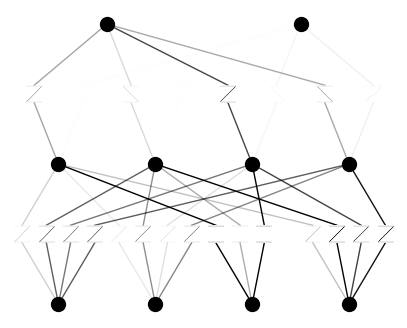

In [9]:
model = model.prune()
model(dataset['train_input'])
model.plot()

Continue training and replot

In [10]:
model.train(dataset, opt="LBFGS", steps=50);

train loss: 9.24e-03 | test loss: 1.25e-02 | reg: 1.32e+03 : 100%|██| 50/50 [00:22<00:00,  2.23it/s]


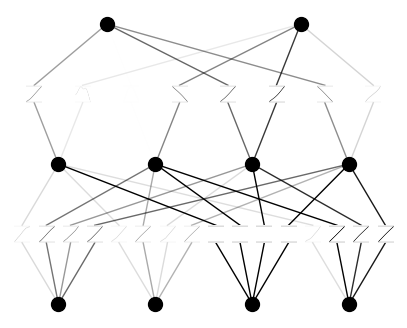

In [11]:
model.plot()

Automatically or manually set activation functions to be symbolic

In [12]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

fixing (0,0,0) with abs, r2=0.9995839595794678
fixing (0,0,1) with sin, r2=0.9999415874481201
fixing (0,0,2) with sqrt, r2=0.9998347163200378
fixing (0,0,3) with sin, r2=0.9998999834060669
fixing (0,1,0) with x^2, r2=1.0000007152557373
fixing (0,1,1) with x^2, r2=1.0000004768371582
fixing (0,1,2) with abs, r2=1.0000005960464478
fixing (0,1,3) with abs, r2=1.0000004768371582
fixing (0,2,0) with abs, r2=0.0
fixing (0,2,1) with exp, r2=1.0
fixing (0,2,2) with exp, r2=1.0
fixing (0,2,3) with abs, r2=0.0
fixing (0,3,0) with sin, r2=0.9989367127418518
fixing (0,3,1) with sin, r2=0.9999967217445374
fixing (0,3,2) with sqrt, r2=0.9999053478240967
fixing (0,3,3) with sin, r2=0.9999761581420898
fixing (1,0,0) with sin, r2=0.9998180270195007
fixing (1,0,1) with x^2, r2=0.9268176555633545
fixing (1,1,0) with sin, r2=0.9898816347122192
fixing (1,1,1) with sqrt, r2=0.9998425841331482
fixing (1,2,0) with tanh, r2=0.9998863339424133
fixing (1,2,1) with tanh, r2=0.9996582865715027
fixing (1,3,0) with x

Continue training to almost machine precision

In [13]:
model.train(dataset, opt="LBFGS", steps=50);

train loss: nan | test loss: nan | reg: nan :  10%|█▊                | 5/50 [00:02<00:25,  1.79it/s]


RuntimeError: false INTERNAL ASSERT FAILED at "..\\aten\\src\\ATen\\native\\BatchLinearAlgebra.cpp":1538, please report a bug to PyTorch. torch.linalg.lstsq: (Batch element 0): Argument 6 has illegal value. Most certainly there is a bug in the implementation calling the backend library.

Obtain the symbolic formula

In [ ]:
model.symbolic_formula()[0][0]

1.0*exp(1.0*x_2**2 + 1.0*sin(3.14*x_1))